In [1]:
import numpy as np
import pandas as pd
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn import svm

In [2]:
df = pd.read_excel(r'''D:\RAPHAEL\semester 7\machine learning\File pelaksanaan\Rekapitulasi Nilai Praktikum Dasar Sistem Kendali 2021(FIX3).xlsx''')
df.head()


,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Rata - Rata Nilai,Responsi,Nilai Akhir,Grade
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,51.24625,11.25,62.49625,C+
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,24.46875,0.00,24.46875,E
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,54.31250,9.00,63.31250,C+
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,20.54375,6.75,27.29375,E
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,57.73000,8.00,65.73000,B-


In [3]:
df = df.drop([ 'Grade', 'Rata - Rata Nilai'],axis='columns')
df.head()

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Responsi,Nilai Akhir
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,11.25,62.49625
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,0.00,24.46875
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,9.00,63.31250
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,6.75,27.29375
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,8.00,65.73000


In [4]:
conditions = [
    (df['Nilai Akhir'] <= 49),
    (df['Nilai Akhir'] >= 50)
    ]

In [5]:
values = [0, 1]
df['Status'] = np.select(conditions, values)
df.head()

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Responsi,Nilai Akhir,Status
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,11.25,62.49625,1
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,0.00,24.46875,0
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,9.00,63.31250,1
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,6.75,27.29375,0
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,8.00,65.73000,1


In [6]:
# jumlah data 1 dan 0 pada target
df['Status'].value_counts()

1    225
0     44
Name: Status, dtype: int64

In [7]:
inputs = df.drop('Status',axis='columns')
target = df['Status']
inputs.head()

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Responsi,Nilai Akhir
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,11.25,62.49625
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,0.00,24.46875
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,9.00,63.31250
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,6.75,27.29375
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,8.00,65.73000


In [8]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Status, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split # Import train_test_split function
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs, target, test_size=0.25)


In [10]:
pred_train.shape

(201, 10)

In [11]:
pred_test.shape

(68, 10)

In [12]:
tar_train.shape

(201,)

In [13]:
tar_test.shape

(68,)

In [15]:
from sklearn.model_selection import cross_val_score

In [25]:
#perhitungan dengan cv = 5
cv5=cross_val_score(svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), inputs, target,cv=5)
cv5

array([ 0.87037037,  0.87037037,  0.87037037,  0.83333333,  0.8490566 ])

In [26]:
import statistics
x=statistics.mean(cv5)
x

0.85870020964360583

In [27]:
#perhitungan dengan cv = 10
cv10=cross_val_score(svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), inputs, target,cv=10)
cv10

array([ 0.85714286,  0.85714286,  0.89285714,  0.85714286,  0.88888889,
        0.84615385,  0.84615385,  0.84615385,  0.84615385,  0.84615385])

In [28]:
y=statistics.mean(cv10)
y

0.85839438339438334

In [29]:
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
classifier = model.fit(pred_train,tar_train)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
classifier.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
predictions = classifier.predict(pred_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#accuracy
print("Accuracy is",accuracy_score(tar_test, predictions, normalize = True))

accuracy of training dataset is1.00
accuracy of test dataset is 0.94
Accuracy is 0.941176470588


In [34]:
xx = model.predict([[47,55,59,56,47,47,60,54,54,56]])
xx

array([1])

In [35]:
if xx == 1:
   print ("Lulus ")
else:
   print ("TIdak Lulus ")


Lulus 


In [36]:
# sebaran nilai pada tar_test(datatest)
tar_test.value_counts()

1    63
0     5
Name: Status, dtype: int64

In [37]:
#rata-rata data tar_test
tar_test.value_counts().head(1) / len(tar_test)

1    0.926471
Name: Status, dtype: float64

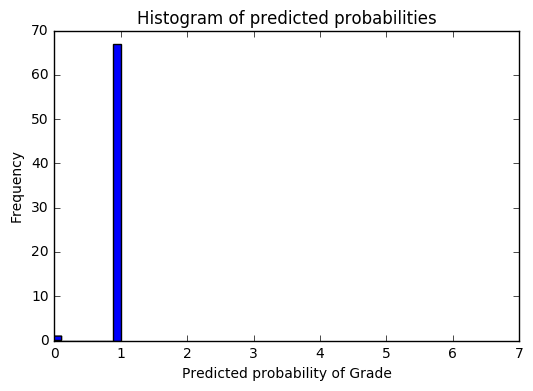

In [38]:
#Pengambaran histogram hasil prediksi data
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(predictions, bins=9)
plt.xlim(0, 7)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Grade')
plt.ylabel('Frequency')

In [39]:
# Prediksi dari 25 data awal
print('True:', tar_test.values[0:25])
print('Pred:', predictions[0:25])

True: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
#Confusion Matrix
from sklearn import metrics
print(metrics.accuracy_score(tar_test, predictions))

0.941176470588


In [41]:
print(metrics.confusion_matrix(tar_test,predictions))

[[ 1  4]
 [ 0 63]]
